## Week 5: Introduction to Statistics using Python (Part 2)

In Part 1 we covered descriptive statistics for single and multivariable datasets including measures of central tendency, variability and quantiles, along with the Central Limit Theorem and confidence interval for the mean.

In this section you will learn:

- Hypothesis testing in the form of 2-samples comparison
- How to choose between parametric and non-parametric statistical tests
- What is a p-value and t-statistic in t-test
- How to find correlation between samples
- What is multiple testing correction and how to apply it

In [51]:
# You need to load some Python modules first:

import random # Get module containing seed function 
import pandas as pd # For creation of dataframes and associated operations
import seaborn as sns # Used for data visualisations
import matplotlib.pyplot as plt # Used for data visualisations
import statsmodels.stats.api as sms # For confidence interval
import numpy as np  # For numpy array operations
from scipy import stats # Stats Functions
import statsmodels.api as sm # For stats models 

### Two-Sample Comparison: T-test

A t-test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another. In an ideal world we could use the whole population (all people, all cells, etc.) to determine whether a hypothesis is true, but in practice it impossible and we only can deal with random samples i.e. subsets of population.

For example let's say that in our experiment we want to see if an antibiotic treatment is effective. We therefore have two groups of cell cultures, one treated with antibiotic and the other is not treated (this is our control group). You have been observing some parameter for these two groups of cultures, e.g. number of cells.

Our question was: 'Has this treatment caused cell death?' (In other words, we want to know whether the number of dead cells in treated cell culture is higher than in control group).

So now, we have the question (our hypothesis): 

- The null hypothesis (H0) is that the true difference between these group means is zero i.e. no difference between treatment groups.

- The alternate hypothesis (Ha) is that the true difference is different from zero i.e. there is a difference between treatment groups. 

Let's upload the data consisting of 2 groups: treated and control cell cultures. Each group is representing the number of dead cells in culture. In total, we have 50 obseravtions. It's just imaginary data, so it has nothing to do with real experiments.

In [52]:
# Read data from file 'ttest.csv'
data = pd.read_csv("/home/lydia/Downloads/ttest.csv", sep="\t") 

# Preview the first 5 lines of the loaded data 
data.head()

,treated,control
1,7,3
2,11,7
3,13,5
4,8,4
5,6,7


As we have seen in part one, it's always a good idea to plot your data first in order to get an idea of distribution and the difference between the 2 groups visually. As you can see below the groups are clearly separated. The treated group is shifted to the right and has greater values. This seems to indicate that there is a difference between the two groups. However, this will have to be verified statistically. 

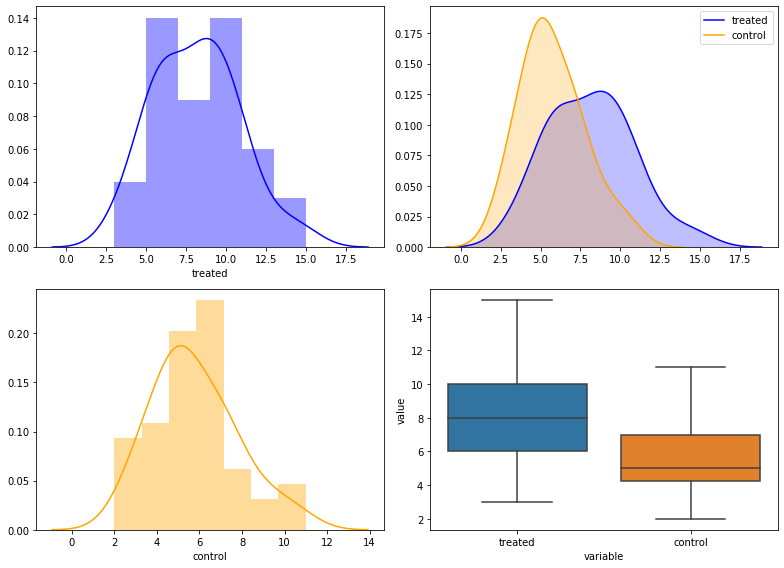

In [53]:
# We will use the module seaborn to carry out most of the data visualisations 

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11,8), sharex=False)

# Plot a simple histogram with binsize determined automatically
sns.distplot(data.iloc[:,0], hist=True, color="b", ax=axes[0, 0])

# Density plots with histogram (of cell counts)
sns.distplot(data.iloc[:,1], hist=True, color="orange", ax=axes[1,0])

# Density plots (of cell counts)
p1=sns.kdeplot(data.iloc[:,0], shade=True, color="b", ax=axes[0,1])
p1=sns.kdeplot(data.iloc[:,1], shade=True, color="orange", ax=axes[0,1])

# Boxplots (of cell counts)
sns.boxplot(x="variable", y="value", data=pd.melt(data), ax=axes[1,1]);

#plt.setp(axes, yticks=[])
plt.tight_layout()

So from the plots above it seems like there is a difference between the groups i.e treated cell cultures have more dead cells than control cell cultures. In order to make an informaed decision about the effectiveness of the treatment a statistical analysis has to be done. This will help us answer how significant this difference is. As you might recall from your past courses on statistics or even from a few paragraphs above, in such cases t-tests can be used. A t-test is a statistical test that is used to compare the means of two groups. 

A number of hypothesis can be formulated:

**1) A one-sided hypothesis:**

**H0:** mean_control = mean_treatment

**H1:** mean_control < mean_treatment

where mean_control is the mean of the control group and mean_treatment is the mean of treated group. H0 indicates there is no difference between groups while H1 indicates a difference in one direction. H1 indicates the average number of dead cells in the treated group is higher than in control cultures, which means that treatment may cause cell death.

**OR**

**H0:** mean_control = mean_treatment

**H1:** mean_control > mean_treatment

**2) A two-sided hypothesis:**

**H0:** mean_control = mean_treatment

**H1:** mean_control != mean_treatment

In this case, H0 means that there is no difference between groups i.e. treatment does not cause any changes. H1 says there is a significant difference i.e that treatment can cause either cell reproduction or cell death.

Usually a one-sided hypothesis test should be used if you discover a statistically significant difference in a particular direction. 

**T-test can be paired on unpaired.**

Paired t-test compares study subjects at 2 different times (paired observations of the same subject). Unpaired t-test compares two different independent subjects.

In [54]:
# Let's carry out a t-test on our data to test if there is a 
# significant difference between treatment groups 

# Check columns in data
print(data.head())

# Carry out two-sided unpaired t-test using assumption of 
# equal variances (assumption which should be checked 
# before applying test)

# H0: mean_control = mean_treatment
# H1: mean_control != mean_treatment 

ttest = stats.ttest_ind(data.iloc[:,1], data.iloc[:,0], equal_var=True) # control first, then treatment 

# We use unpaired test becuase the cell cultures are independent
# Type of the hypotheses. Could be greater, less, two.sided -> 
# This is a two-sided test 

# Returns the calculated t-statistic and the two-tailed p-value.
# This is the output for a two-tailed t-test so we must divide by 
# 2 for a one-tailed test.

print("Two-sided t-test test statistic:", ttest[0])
print("Two-sided t-test p-value:", ttest[1])

# H0: mean_control = mean_treatment
# H1: mean_control < mean_treatment (less than)

# ttest gives the test statistic as signed. 
# This means that given p-value and t stats from a two-tailed test, 
# you would reject the null hypothesis of a greater-than test when p/2
# < alpha and t > 0, and of a less-than test when p/2 < alpha and 
# t < 0.

print("One-sided t-test p-value:", ttest[1]/2) 

   treated  control
1        7        3
2       11        7
3       13        5
4        8        4
5        6        7
Two-sided t-test test statistic: -4.996434879741847
Two-sided t-test p-value: 2.5508525745899526e-06
One-sided t-test p-value: 1.2754262872949763e-06


Let's interpret the output. Generally, we use the p-value to draw conclusion. So, in this case where the p-value < 0.05, we have evidence to reject H0 at this significance level, and conclude that there is a difference between groups. For the results of our one-sided test we must look at our test statistic (-5).

We know that ttest gives the test statistic as signed. This means that given the p-value and t-stat from a two-tailed test, you would reject the null hypothesis of a greater-than test (mean_control > mean_treatment) when p/2 < alpha and t > 0, and of a less-than test (mean_control < mean_treatment) when p/2 < alpha and t < 0. As our test statistic is negative and our p/2 = 1.25e-06 < 0.05 we reject the null hypothesis and conclude that the mean of the control group is less than the mean of the treatment group.

But what is the t-test statistic? When you perform a t-test, you calculate a specific measure called T-statistic. It basically measures the size of the difference between sample mean of group 1 and sample mean of group 2 relative to the variation in the sample data. In other words, the T-statistic is simply the calculated difference represented in units of standard error. Just look at the formula (for simplification, denominator is just SE, without details, but it represents standard error of 2 samples):

**Test_Stat = ((M1 - M2) -0)/SE**

where M1 is the mean of group 1 and M2 is the mean of group 2 (in our example, M1 for control and M2 for treatment). As you can see, the greater T, the greater the difference between group means, and the greater evidence against the null hypothesis. The closer T is to 0, the more likely there isn't a significant difference (M1 - M2 = 0 => T = 0, no difference).

When you perform a t-test for a single study, you obtain a single t-value. However, if we drew multiple random samples of the same size from the same population and performed the same t-test, we would obtain many t-values and we could plot a distribution of all of them. T-statistics follows (surprise!) Student's T-distribution with parameter df = degrees of freedom (it depends on the sample size).

The T-distribution is symmetric and bell-shaped, like the normal distribution, but has heavier tails, meaning that it is more prone to producing values that fall far from its mean:

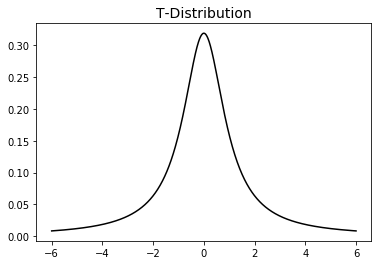

In [55]:
# Basic T-Distribution

# Setup Parameters   
dof = 1    # Degrees of freedom

# Plot 
plt.figure()
xs = np.linspace(-6,6,1000)
plt.plot(xs, stats.t.pdf(xs,dof), 'k')
plt.title('T-Distribution', fontsize=14);

Now let's talk about the p-value. The T-statistic and p-value are tightly linked. T-distributions assume that you draw repeated random samples from a population where the null hypothesis is true. The peak of the graph is right at zero, which indicates that obtaining a sample value close to the null hypothesis is the most likely.

You place the t-value from your study in the t-distribution to determine how consistent your results are with the null hypothesis. If its far from zero, closer to any tail, it means that it is unlikely to get such samples that are so different from null hypothesis.

Let's look at the plot with our example. T-statistic has df=98, and it takes value -4.996 (as you may have noticed that it's definetely far from 0). p-value = 1.275e-06 (super small!). The degrees of freedom of an estimate is the number of independent pieces of information that went into calculating the estimate. It’s not quite the same as the number of items in the sample. If you have two samples and want to find a parameter, like the mean, you have two “n”s to consider (sample 1 and sample 2). Degrees of freedom in that case is: (N1 + N2) – 2.

If we plot the T-statistic on our graph (blue line) we can see how far it is from 0. We can also see that the p-value, which is the probability to observe the T-statistic value or more extreme (greater in this case) under the assumption that null hypothesis is true. 

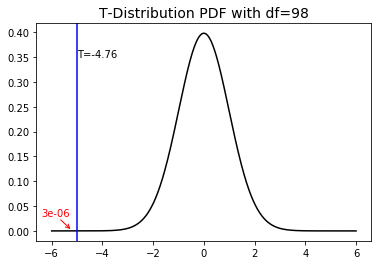

In [56]:
# Plot some vertical lines representing critical t-score cutoff
# Setup      
dof = 98       # Degrees of freedom
alpha = 0.05    # Significence level

# Plot 
plt.figure()
xs = np.linspace(-6,6,1000)
plt.plot(xs, stats.t.pdf(xs,dof), 'k')

plt.axvline(-4.996, color='b', linestyle='-')
plt.text(-5,0.35,'T=-4.76')
plt.text(-6.4, 0.03,'3e-06', color="r")
plt.title('T-Distribution PDF with df=98', fontsize=14)
plt.annotate("", xy=(-5.2, 0.001), xytext=(-5.7, 0.025), arrowprops=dict(arrowstyle="->",  color="r"));

Another thing to consider is the confidence interval for the mean difference. If it includes 0 this indicates that the sample data are compatible with the null hypothesis. 

In [57]:
cm = sms.CompareMeans(sms.DescrStatsW(data.iloc[:,1]), sms.DescrStatsW(data.iloc[:,0]))
# Control - Treatment 

# For two-sided t-test
print(cm.tconfint_diff(usevar='pooled'))

# For one-sided t-test
print(cm.tconfint_diff(usevar='pooled', alternative="smaller"))

(-3.2973369823022636, -1.422663017697737)
(-inf, -1.575660572678883)


In our case the 95% confidence interval is (-3.41, -1.42) for our two-sided test and (-inf, -1.576) for a one-sided test. These intervals do not contain 0, which indicates again that we shoult reject the H0 and accept H1. You can also think of the confidence interval as arms that "embrace" values that are consistent with the data. If the null value is "embraced", then H0 is certainly not rejected. In this case the CI are negative values indicating that the treatment group contain a higher number of dead cells than the control group.

### T-test Assumptions

Before applying a T-test we must check that the assumptions of this test are met:

The assumptions of the t-test are that the data are normally distributed and the variances of the groups to be compared are homogeneous (equal). To test the normality assumption we can use Shapiro-Wilk’s test and to assess the equal variance assumption we can use Bartlett’s Test or Levene’s Test.

#### Shapiro-Wilks Test

The null hypothesis for the Shapiro-Wilk test is that a variable is normally distributed in some population and the alternative hypothesis is that a variable is not normally distributed in some population.

In [58]:
# Treated
print("Treatment:", stats.shapiro(data.iloc[:,0]))

# Control
print("Control:", stats.shapiro(data.iloc[:,1]))

# Returns the calculated t-statistic and the p-value.

Treatment: (0.9678236842155457, 0.18849964439868927)
Control: (0.9548035860061646, 0.053908929228782654)


For both the control and treatment groups the p-value is greater than 0.05, implying that the distribution of the data in each group are not significantly different from the normal distribution. In other words, we can assume normality. However in cases where the sample size is large enough i.e. sample sizes (n >= 30) the violation of the normality assumption should not cause major problems according to Central Limit Theorem.

Another important thing to note is that the normality test is sensitive to sample size. Small samples often pass normality tests and so it's better to add visual inspection to significance test. For this purpose we can use quantile-quantile plots. These plots represent the correlation between a given sample and the normal distribution. If all points fall approximately across reference line (a 45-degree line), it means normality. In our case we can say that data are normal.

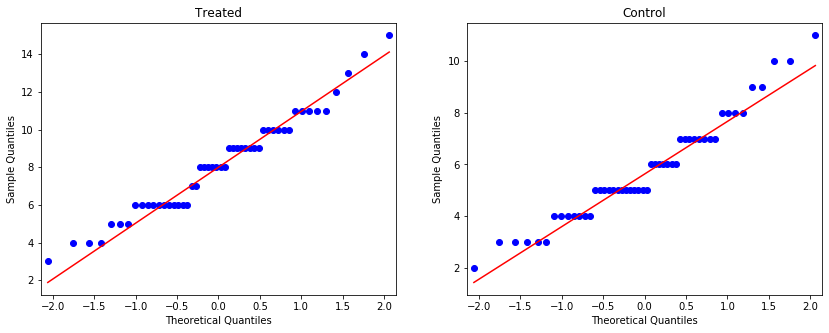

In [59]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(14,5))

# Plot qqplots
sm.qqplot(data.iloc[:,0], line='q', ax=axes[0])
axes[0].set_title('Treated')

sm.qqplot(data.iloc[:,1], line='q', ax=axes[1])
axes[1].set_title('Control');

### Example with Non-Normal Data

Non-Normal Data: (0.730923593044281, 3.255692604398064e-07)


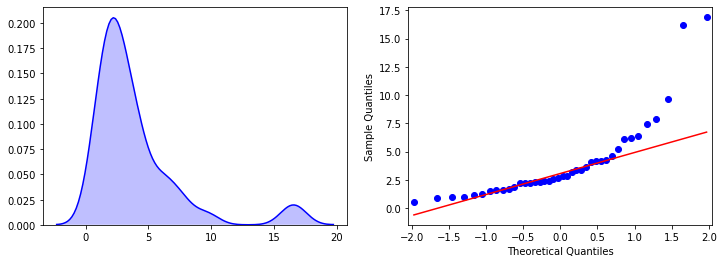

In [60]:
np.random.seed(125) 

# Generate Data
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 40)

print("Non-Normal Data:", stats.shapiro(s))

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12,4))

# Plot a simple density and qq plot 
sns.kdeplot(s, shade=True, color="b", ax=axes[0])
sm.qqplot(s, line='q', ax=axes[1]);

# notice how the points do not fall across the line at the upper end 

The assumption of equal variances has to be tested next. If the samples follow a normal distribution we use  Bartlett’s Test to test the equality of variances. The Levene test is an alternative to the Bartlett test that is less sensitive to departures from normality.

In [61]:
print("Bartletts p-value:", stats.bartlett(data.iloc[:,1], data.iloc[:,0])[1])

Bartletts p-value: 0.0522336366282762


The null hypothesis for  Bartletts test is that the variances are equal for all samples while the alternate hypothesis (the one you’re testing), is that the variances are not equal. As p-value > 0.05, we fail to reject the null hypothesis that the variance is the same for both groups.

We can also test it using Levene's test. This test is considered more robust since it is less sensitive to data deviations from normal distribution

In [62]:
print("P-value:", stats.levene(data.iloc[:,0], data.iloc[:,1])[1])

# P-value > 0.05, there is no evidence to reject null hypothesis 
# about equal variances in populations.

P-value: 0.06715232291986864


### Non-Parametric Test for 2-Sample Comparison

If the assumption about normality is not true we can use the Wilcoxon test (also known as Wilcoxon rank sum test or Mann-Whitney test). It is rank-based test. This test is used to test whether two samples are likely to derive from the same population (i.e., that the two populations have the same shape). Some investigators interpret this test as comparing the medians between the two populations. 

Let's say we have the same question about treated and control cells whether drug cause cell death or not. We are going to use a different dataset for this section.

In [63]:
# Read data from file 'filename.csv' 
data1 = pd.read_csv("Datasets/non-parametric-test.txt", sep="\t") 

# Preview the first 5 lines of the loaded data 
data1.head()

,treated,control
1,4,0
2,4,0
3,5,0
4,5,1
5,9,2


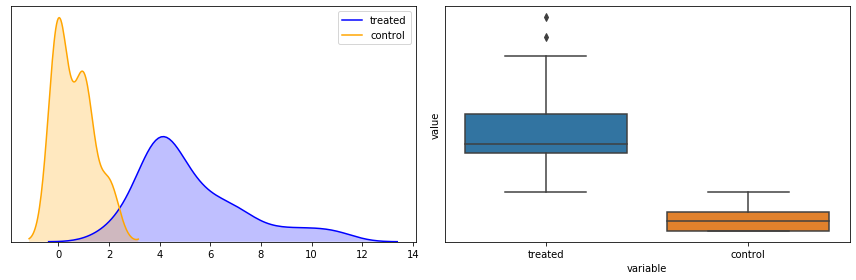

In [64]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(12,4))

# Density Plots
p1=sns.kdeplot(data1.iloc[:,0], shade=True, color="b", ax=axes[0])
p1=sns.kdeplot(data1.iloc[:,1], shade=True, color="orange", ax=axes[0])

# Boxplots
sns.boxplot(x="variable", y="value", data=pd.melt(data1), ax=axes[1]);

plt.setp(axes, yticks=[])
plt.tight_layout()

# As you can see here, samples are not normally distributed according 
# to the shape. As you may remember, if the number of observations 
# is more than 30, we can use t-test even without normality assumption. 

# Here it's exactly 30, and so it's better to use non-parametric form
# surely you can also check normality with normality test and plot 
# qq plot

As you can see here, the p-value is extremely low (p-value < 0.05) and so we can reject H0 and accept H1, which means that there is a significant difference between groups and the treated group has more dead cells than control.

In [65]:
print("Wilcoxon p-value:", stats.wilcoxon(data1.iloc[:,0], data1.iloc[:,1], alternative='greater', correction=True)[1])

Wilcoxon p-value: 8.015594206849556e-07


#### Paired T-tests

The paired sample t-test, sometimes called the dependent sample t-test, is a statistical procedure used to determine whether the mean difference between two sets of observations is zero. In a paired sample t-test, each subject or entity is measured twice, resulting in pairs of observations. Paired t-test can be used only when the difference between data points is normally distributed. This can be checked using Shapiro-Wilk test. Otherwise, you should use non-parametric paired Wilcoxon test. If the sample size is more than 30 then t-test can be used without normality check.

Let's look at an example, in this case 20 cats have received a treatment over 6 months. We want to know whether the treatment has an impact on the weight of the cats. So, we have a dataset with observations on the untreated cats and then observations on the same cats but after treatment. These are paired observations.

In [66]:
# Read data from file 'Paired.txt' 
data2 = pd.read_csv("Datasets/Paired.txt", sep="\t") 

# Preview the first 5 lines of the loaded data 
data2.head()

,group,weight
1,before,5.5
2,before,7.5
3,before,4.5
4,before,6.3
5,before,6.1


In [67]:
# Subsetting data into two groups 

before = data2[data2.group == "before"]
before = before.reset_index(drop=True)

after = data2[data2.group == "after"]
after = after.reset_index(drop=True)

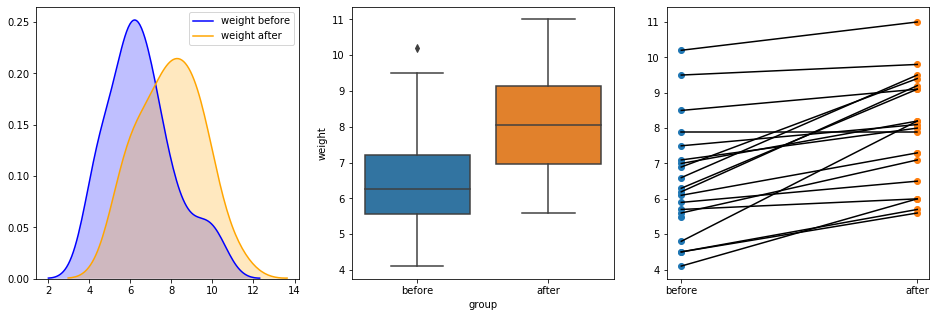

In [68]:
# Visually inspect the data by plotting density plots, boxplots and 
# a paired plot to show the increase between the same cats

# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(16,5), sharex=False)

# Density Plots
p1=sns.kdeplot(before.iloc[:,1], shade=True, color="b", label="weight before", ax=axes[0])
p1=sns.kdeplot(after.iloc[:,1], shade=True, color="orange", label="weight after",ax=axes[0])

# Boxplots 
sns.boxplot(x="group", y="weight", data=data2, ax=axes[1]);

# Paired Plot
plt.scatter(np.zeros(len(before.iloc[:,1])), before.iloc[:,1])
plt.scatter(np.ones(len(after.iloc[:,1])), after.iloc[:,1])

# Plotting the lines
for i in range(1, len(before.iloc[:,1])):
    plt.plot([0,1], [before.iloc[i,1], after.iloc[i,1]], c='k')

plt.xticks([0,1], ['before', 'after']);

**Now let's check the assumptions:**

In [69]:
# Check that differences have normal distribution
print("Shaprio p-value:", stats.shapiro(before.iloc[:,1]-after.iloc[:,1])[1])

# p-value > 0.05, there is no evidence to reject H0 
# We can assume normal distribution and use t-test here

# Check for equal variances

print("Bartlett p-value:", stats.bartlett(before.iloc[:,1], after.iloc[:,1])[1])

# p-value > 0.05, there is no evidence to reject H0
# We can assume equal variances

Shaprio p-value: 0.11542130261659622
Bartlett p-value: 0.7570728060693703


**Now let's carry out a Paired t-test to see if the treatment had any effect on cat weight:**

In [70]:
# Perform Paired t-test. 
# We are interested in overall difference weight in both directions 
# i.e. whether the cats gained weight or lost it
# so we want to use the two-sided t-test.

# Test: Before - After 
print("T-test statistic:", stats.ttest_rel(before.iloc[:,1], after.iloc[:,1])[0])
print("T-test p-value:", stats.ttest_rel(before.iloc[:,1], after.iloc[:,1])[1])

print("95% CI:", sms.DescrStatsW(before.iloc[:,1] - after.iloc[:,1]).tconfint_mean())

# As we can see the p-value is low (< 0.05)
# We can reject H0 at this level of significance and conclude that 
# the treatment has an impact on weight. 
# Also as the test stat is negative and the p-value is small 
# (p/2 < alpha and t < 0) this indicates that we
# reject the H0 of the less than test (before < after) 
# and conclude that cats in the treatment group are heavier.

# In addition, 95% confidence interval for mean difference is 
# (-1.9041568, -0.9558432) which does not contain 0. 
# And it is also strictly below zero, which suggests that the 
# treatment caused weight gain. 

# Note: If the difference between paired points is not normally 
# distributed use paired wilcoxon test 

T-test statistic: -6.312309137025065
T-test p-value: 4.656060553477524e-06
95% CI: (-1.9041568153321466, -0.9558431846678533)


#### Multiple Testing Corrections 

When we carried out the hypothesis tests above we used 0.05 as our p-value cutoff for significance.  This is the significance level (alpha) for a statistical test and is the probability of the study rejecting the null hypothesis, given that the null hypothesis were assumed to be true. In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis (also known as a "false positive" finding or conclusion), while a type II error is the non-rejection of a false null hypothesis (also known as a "false negative" finding or conclusion. 

So what is the multiple testing problem? Say you have a set of hypotheses that you wish to test simultaneously. The first idea that might come to mind is to test each hypothesis separately, using some level of significance α.
At first blush, this doesn’t seem like a bad idea. However, consider a case where you have 20 hypotheses to test, and a significance level of 0.05. What’s the probability of observing at least one significant result just due to chance? If your chance of making an error in single test is alpha, then your chance to make one or more errors (false positives, mistakenly rejected H0) in m tests will be:

**P(at least 1 error) = 1-(1-alpha)^m**

**P(at least one significant result) = 1 − P(no significant results)**
**= 1 − (1 − 0.05)20**
**≈ 0.64**

So, with 20 tests being considered, we have a 64% chance of observing at least one significant result, even if all of the tests are actually not significant. In genomics and other biology-related fields, it’s not unusual for the number of simultaneous tests to be quite a bit larger than 20 and the probability of getting a significant result simply due to chance keeps going up. 

Let's look at this on a plot:

![Multiple Testing](Images/pval_adj.png)

If m is large, the chances to get at least one error will be nearly 100%! That’s why we need to adjust the p-values for the number of hypothesis tests performed, or to control type I error rate.

In [71]:
# Load up data containing 100 generated t-test p-values 
data = pd.read_csv("Datasets/P-values.txt", sep="\t") 

# How many significant pvalues?
sum(data.iloc[:,0] <= 0.05)

27

There are multiple way to adjust p-values.

#### 1) Bonferroni correction

In [72]:
# To get the Bonferroni corrected/adjusted p value, 
# divide the original α-value by the number of 
# analyses on the dependent variable.

# Let's do the correction manually first by using a bonferroni 
# corrected p-value
new_alpha = 0.05/100
print("Number of significant p-values:", sum(data.iloc[:,0] <= new_alpha))

# Python has a module to adjust the p-values of each observation 
from statsmodels.sandbox.stats.multicomp import multipletests

p_adjusted = multipletests(data.iloc[:,0], alpha=0.05, method='bonferroni')
print("Number of significant p-values:", sum(p_adjusted[1] <=0.05))

Number of significant p-values: 2
Number of significant p-values: 2


#### 2) Benjamini and Hochberg

The Benjamini–Hochberg method controls the False Discovery Rate (FDR) using sequential modified  Bonferroni correction for  multiple hypothesis testing. While the  Bonferroni correction relies on the Family Wise Error Rate (FWER), Benjamini and Hochberg introduced the idea of a FDR to control for multiple hypotheses testing. In the statistical context, discovery refers to the rejection of a hypothesis. Therefore, a false discovery is an incorrect rejection of a hypothesis and the FDR is the likelihood such a rejection occurs. Controlling the FDR instead of the FWER is less stringent and increases the method’s power. As a result, more hypotheses may be rejected and more discoveries may be made.

In [73]:
p_adjusted = multipletests(data.iloc[:,0], alpha=0.05, method='fdr_bh')
print("Number of significant p-values:", sum(p_adjusted[1] <=0.05))

Number of significant p-values: 5


### Correlation

The word correlation is used in everyday life to denote some form of association. In statistical terms we use correlation to denote association between two quantitative variables. We also assume that the association is linear, that one variable increases or decreases a fixed amount for a unit increase or decrease in the other.

The degree of association is measured by a correlation coefficient, denoted by r. It is sometimes called Pearson's correlation coefficient after its originator and is a measure of linear association. If a curved line is needed to express the relationship, other and more complicated measures of the correlation must be used.

The correlation coefficient is measured on a scale that varies from + 1 through 0 to - 1. Complete correlation between two variables is expressed by either + 1 or -1. When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative. Complete absence of correlation is represented by 0.

Pearson correlation measures the linear dependence between 2 variables but we can only apply it if both variables follow a normal distribution. In the case where they don't we us the non-parametric test: Kendall and Spearman correlation. 

Let's calculate correlation coefficient:

In [74]:
# Create Data
var1 = [21.0, 21.0, 22.8, 21.4,18.7, 18.1, 14.3, 24.4,22.8,  19.2,  17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7]
var2 = [160.0, 160.0, 108.0, 258.0, 360.0, 225.0, 360.0, 146.7, 140.8, 167.6, 167.6, 275.8, 275.8, 275.8, 472.0, 460.0, 440.0]

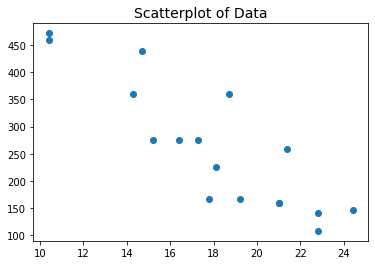

In [75]:
# Plot them first to convince that there is linear dependence 
# (a linear relationship)
plt.scatter(var1, var2)
plt.title('Scatterplot of Data', fontsize=14);

In [76]:
# Check the normality assumption first
# Remember the null hypothesis for this test is that the 
# data are normally distributed

print("Var1 p-value:", stats.shapiro(var1)[1])
# p-value = 0.5916, we can assume normality

print("Var2 p-value:", stats.shapiro(var2)[1])
# p-value = 0.06996, we can assume normality, but it close to significance level 0.05.

Var1 p-value: 0.5916309356689453
Var2 p-value: 0.06996051222085953


Now let's test the correlation between var1 and var2

In [77]:
# This calculates correlation coefficient
print("Correlation:", stats.pearsonr(var1, var2)[0])

# It is close to -1 which means that 2 variables are negatively 
# correlated

Correlation: -0.8747750131737493


The correlation coefficient measures only the strength of a relationship in the samples only. Because we want to draw conclusion about populations not just samples, we have to conduct a statistical significance test and obtain p-value.

Here we use the null and alternative hypothesis: 

**H0:** correlation coefficient = 0

**H1:** correlation coefficient != 0

In [78]:
# Lets write a function to get results from correlation test 

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(len(x)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

# Apply function 
print("Correlation:", pearsonr_ci(var1, var2, 0.05)[0])
print("P-value:", pearsonr_ci(var1, var2, 0.05)[1])
print("CI Lower Bound:", pearsonr_ci(var1, var2, 0.05)[2])
print("CI Upper Bound:", pearsonr_ci(var1, var2, 0.05)[3])

Correlation: -0.8747750131737493
P-value: 4.33528583193924e-06
CI Lower Bound: -0.9542145262661728
CI Upper Bound: -0.6800696212289777


As we can see, the p-value < 0.05. As a reslt we can reject H0 and conclude that the correlation coefficient 
does not equal 0 i.e there is a significant correlation between variables. Furthermore the confidence interval, is (-0.9542145 -0.6800696) which is strictly negative and does not contain 0. This provides further evidence that there is a significant correlation between variables, it also indicates this correlation is negative. 

In [79]:
# If the data are not normal, you can use non-parametric test:
print("Correlation:", stats.spearmanr(var1, var2)[0])

Correlation: -0.893960794811642


### Visualise Correlation: Correlation matrix plot

If you have multiple variables, you can create a fancy plot like this to show pairwise correlation coefficients:

In [80]:
# Read data in data
data3 = pd.read_csv("Datasets/Corplot.txt", sep="\t") 

# Preview the first 5 lines of the loaded data 
data3.head()

,var1,var2,var3,var4,var5
1,21.0,16.46,4,4,160.0
2,21.0,17.02,4,4,160.0
3,22.8,18.61,4,1,108.0
4,21.4,19.44,3,1,258.0
5,18.7,17.02,3,2,360.0


In [81]:
# Calculate the correlation matrix  
print(pd.DataFrame(data3).corr())

          var1      var2      var3      var4      var5
var1  1.000000  0.418684  0.480285 -0.550925 -0.847551
var2  0.418684  1.000000 -0.212682 -0.656249 -0.433698
var3  0.480285 -0.212682  1.000000  0.274073 -0.555569
var4 -0.550925 -0.656249  0.274073  1.000000  0.394977
var5 -0.847551 -0.433698 -0.555569  0.394977  1.000000


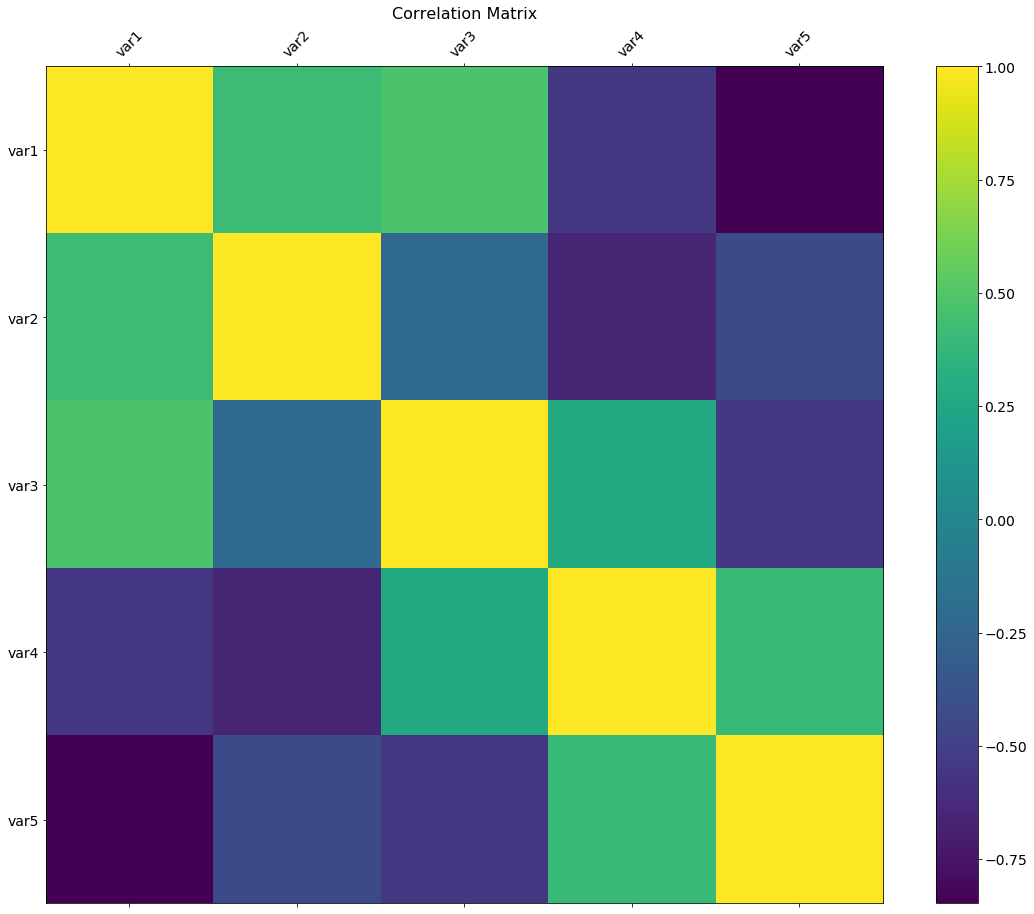

In [82]:
# Totally yellow shades represent the case where correaltion = 1 
# Yellow/green shades represent a positive correlation. The more yellow it is the greater the + correlation 
# Blue/purple shades represent negative correlations, The more dark blue it is the greater the - correlation
# Totally darkest blue represent the case where correaltion = -1 

f = plt.figure(figsize=(19, 15))
plt.matshow(pd.DataFrame(data3).corr(), fignum=f.number)
plt.xticks(range(pd.DataFrame(data3).shape[1]), pd.DataFrame(data3).columns, fontsize=14, rotation=45)
plt.yticks(range(pd.DataFrame(data3).shape[1]), pd.DataFrame(data3).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Important: Spurious correlations

Sometimes you might encounter a case where  the correlation coefficient can be high but dependence between variables is not linear. Some examples are shown below and remind us that visualising your data is important! 
Remember correlation does not mean causation!

In [83]:
# Generate data and correlations
x = np.arange(1,50)
y1 = x**2 + 3*x**3
y2 = np.cos(0.5*x) + np.log(14*x)

print("plot 1 correlation:", stats.pearsonr(x, y1)[0]) 
print("plot 2 correlation:", stats.pearsonr(x, y2)[0]) 

plot 1 correlation: 0.9191147119571419
plot 2 correlation: 0.7203326553082032


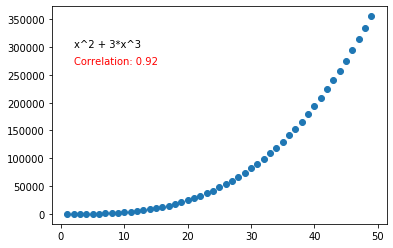

In [84]:
# Plot 
plt.scatter(x, y1)
plt.text(2,300000,'x^2 + 3*x^3')
plt.text(2,270000,'Correlation: 0.92', color = "r");

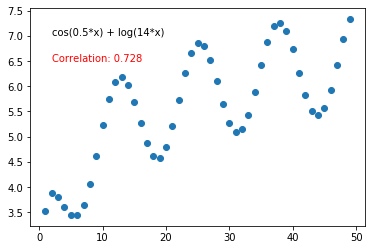

In [85]:
plt.scatter(x, y2)
plt.text(2,7,'cos(0.5*x) + log(14*x)')
plt.text(2,6.5,'Correlation: 0.728', color="r");